# Глава 6. Создание первой глубокой нейронной сети

## Задача о светофоре

In [31]:
import numpy as np

weights = np.array([0.5, 0.48, -0.7])
alpha = 0.1

streetlights = np.array([[1, 0, 1],
                         [0, 1, 1],
                         [0, 0, 1],
                         [1, 1, 1],
                         [0, 1, 1],
                         [1, 0, 1]])

walk_vs_stop = np.array([0, 1, 0, 1, 1, 0])

for i in range(40):
    error_for_all_lights = 0
    for row_index in range(len(walk_vs_stop)):
        input = streetlights[row_index]
        goal = walk_vs_stop[row_index]

        pred = input.dot(weights)

        error = (goal - pred) ** 2
        error_for_all_lights += error
        
        delta = pred - goal
        weights -= delta * input * alpha
    print(error_for_all_lights)

2.6561231104
0.9628701776715985
0.5509165866836797
0.36445836852222424
0.2516768662079895
0.17797575048089034
0.12864460733422164
0.09511036950476208
0.07194564247043436
0.05564914990717743
0.04394763937673939
0.035357967050948465
0.02890700056547436
0.023951660591138853
0.020063105176016144
0.016952094519447087
0.014420818295271236
0.012331739998443648
0.010587393171639842
0.009117233405426495
0.00786904226904208
0.006803273214640502
0.005889303541837786
0.0051029252561172675
0.004424644608684828
0.0038385124412518303
0.0033313054558089675
0.0028919416227737734
0.002511053608117256
0.0021806703520253884
0.0018939739123713475
0.0016451096996342332
0.0014290353984827077
0.0012413985592149145
0.0010784359268087556
0.0009368896209360312
0.0008139366504753339
0.0007071291752624441
0.0006143435674831474
0.00053373677328488


## Первая глубокая нейронная сеть

In [32]:
import numpy as np

np.random.seed(1)

def relu(x):
    return (x > 0) * x

def relu2deriv(output):
    return output > 0

errors = []

alpha = 0.2
hidden_size = 4

streetlights = np.array([[1, 0, 1],
                         [0, 1, 1],
                         [0, 1, 1],
                         [1, 1, 1]])

walk_vs_stop = np.array([[1, 1, 0, 0]]).T

weights_0_1 = 2 * np.random.random((3, hidden_size)) - 1
weights_1_2 = 2 * np.random.random((hidden_size, 1)) - 1

for iter in range(60):
    layer_2_error = 0
    for i in range(len(streetlights)):
        layer_0 = streetlights[i:i+1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)

        layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)

        layer_2_delta = walk_vs_stop[i:i+1] - layer_2
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
    
    errors.append(layer_2_error)
    if iter % 10 == 9:
        print(f"Error: {layer_2_error}")

Error: 0.6858981766560405
Error: 0.6729776283057425
Error: 0.6677911313515308
Error: 0.6649229748460158
Error: 0.6631586783381124
Error: 0.6620500572291844


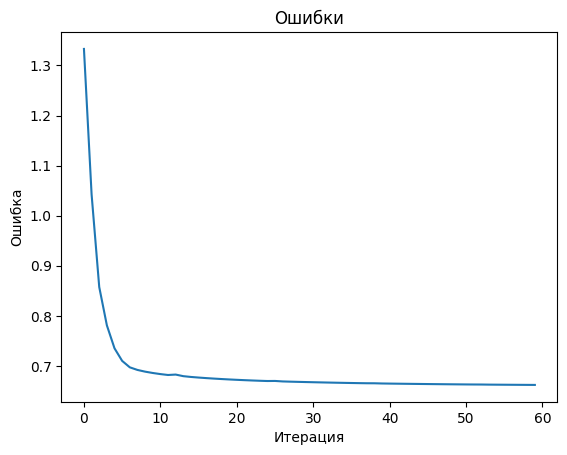

In [33]:
import matplotlib.pyplot as plt


# Построение графика
plt.plot(errors)

# Добавление подписей
plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.title('Ошибки')

# Отображение графика
plt.show()


## Обьединяем всё вместе

In [34]:
import numpy as np

np.random.seed(1)

def relu(x):
    return (x > 0) * x

def relu2deriv(output):
    return output > 0

streetlights = np.array([[1, 0, 1],
                         [0, 1, 1],
                         [0, 0, 1],
                         [1, 1, 1]])

walk_vs_stop = np.array([[1, 1, 0, 1]]).T

alpha = 0.2
hidden_size = 4

weights_0_1 = 2 * np.random.random((3, hidden_size)) - 1
weights_1_2 = 2 * np.random.random((hidden_size, 1)) - 1

errors = []

for iter in range(60):
    layer_2_error = 0
    for i in range(len(streetlights)):
        layer_0 = streetlights[i:i+1]
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)

        layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)

        layer_2_delta = layer_2 - walk_vs_stop[i:i+1]
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)

        weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)
    
    errors.append(layer_2_error)
    if iter % 10 == 9:
        print(f"Error: {layer_2_error}")

Error: 0.35854072057435643
Error: 0.11492427530447064
Error: 0.04698988359451608
Error: 0.020061574426837005
Error: 0.009894755289625051
Error: 0.003513820288455573


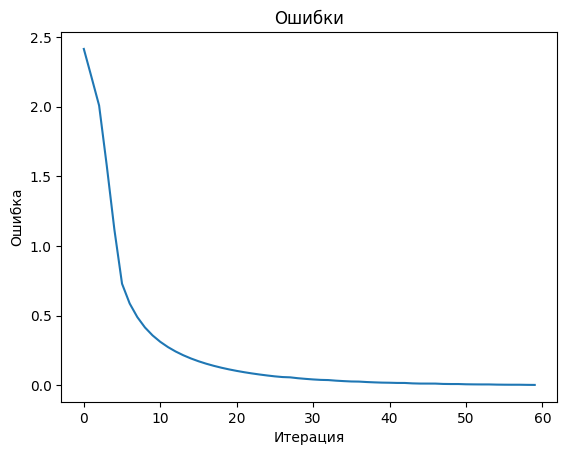

In [35]:
import matplotlib.pyplot as plt

plt.plot(errors)

plt.xlabel('Итерация')
plt.ylabel('Ошибка')
plt.title('Ошибки')

plt.show()